NameError: name 'pd' is not defined

In [2]:
import pandas as pd
import numpy as np

In [3]:
df= pd.read_csv("MOCK_DATA.csv")

In [4]:
df

,bug_id,module,severity,status,reported_date,resolved_date,assigned_to
0,1,Login,High,In Progress,2025-01-04,2025-01-29,David
1,2,Payment,Critical,In Progress,2025-06-03,2025-06-26,Fred
2,3,Notifications,High,Closed,2025-01-12,2025-01-13,Charlie
3,4,Dashboard,Low,In Progress,2024-12-22,2025-01-08,Alice
4,5,Login,High,Resolved,2024-12-15,2025-01-11,Bob
...,...,...,...,...,...,...,...
295,296,Payment,Medium,In Progress,2025-08-31,2025-09-20,Gizel
296,297,Payment,High,Closed,2025-10-04,2025-10-26,Bob
297,298,Dashboard,Critical,Resolved,2025-05-19,2025-06-01,Alice
298,299,Payment,Medium,Open,2024-11-15,2024-11-29,Bob


In [6]:
print(df.isnull().sum())

bug_id           0
module           0
severity         0
status           0
reported_date    0
resolved_date    0
assigned_to      0
dtype: int64


In [8]:
print(df.duplicated().sum())

0


In [11]:
df["reported_date"]= pd.to_datetime(df["reported_date"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bug_id         300 non-null    int64         
 1   module         300 non-null    object        
 2   severity       300 non-null    object        
 3   status         300 non-null    object        
 4   reported_date  300 non-null    datetime64[ns]
 5   resolved_date  300 non-null    object        
 6   assigned_to    300 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 16.5+ KB


In [13]:
df["resolved_date"]= pd.to_datetime(df["resolved_date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   bug_id         300 non-null    int64         
 1   module         300 non-null    object        
 2   severity       300 non-null    object        
 3   status         300 non-null    object        
 4   reported_date  300 non-null    datetime64[ns]
 5   resolved_date  300 non-null    datetime64[ns]
 6   assigned_to    300 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 16.5+ KB


In [26]:
df["resolution_days"] = df["resolved_date"]-df["reported_date"]

In [28]:
df

,bug_id,module,severity,status,reported_date,resolved_date,assigned_to,resolution_days
0,1,Login,High,In Progress,2025-01-04,2025-01-29,David,25 days
1,2,Payment,Critical,In Progress,2025-06-03,2025-06-26,Fred,23 days
2,3,Notifications,High,Closed,2025-01-12,2025-01-13,Charlie,1 days
3,4,Dashboard,Low,In Progress,2024-12-22,2025-01-08,Alice,17 days
4,5,Login,High,Resolved,2024-12-15,2025-01-11,Bob,27 days
...,...,...,...,...,...,...,...,...
295,296,Payment,Medium,In Progress,2025-08-31,2025-09-20,Gizel,20 days
296,297,Payment,High,Closed,2025-10-04,2025-10-26,Bob,22 days
297,298,Dashboard,Critical,Resolved,2025-05-19,2025-06-01,Alice,13 days
298,299,Payment,Medium,Open,2024-11-15,2024-11-29,Bob,14 days


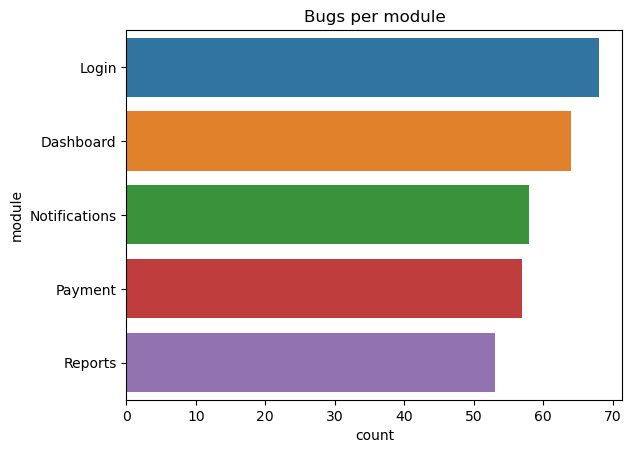

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(y="module", data=df, order=df["module"].value_counts().index)
plt.title("Bugs per module")
plt.show()

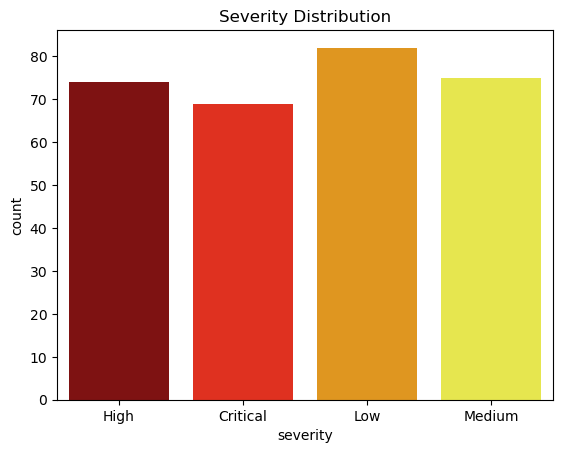

In [59]:
sns.countplot(x="severity", data=df, palette="hot")
plt.title("Severity Distribution")
plt.show()

In [70]:

avg_res_time=df.groupby('module')['resolution_days'].mean().reset_index()
sns.barplot(x="module", y="resolution_days", data=avg_res_time, palette="hot")
plt.title("Avg Resolution Time by Module")
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [73]:
df["resolution_days"].dtype

dtype('<m8[ns]')

In [74]:
df["resolution_days"]=df["resolution_days"].dt.days

In [75]:
df["resolution_days"].dtype

dtype('int64')

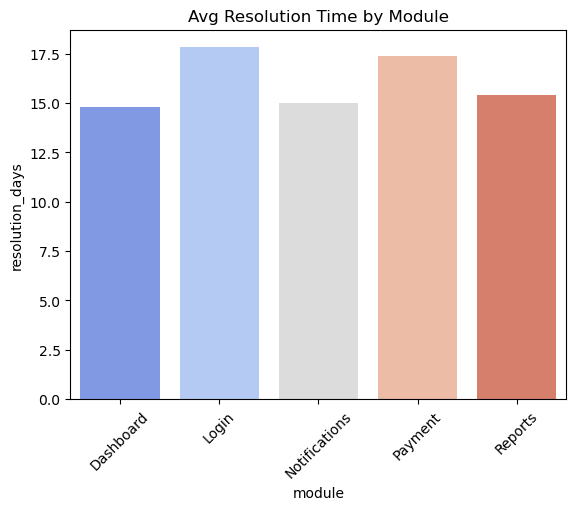

In [91]:
avg_res_time=df.groupby('module')['resolution_days'].mean().reset_index()
sns.barplot(x="module", y="resolution_days", data=avg_res_time, palette='coolwarm')
plt.title("Avg Resolution Time by Module")
plt.xticks(rotation=45)
plt.show()

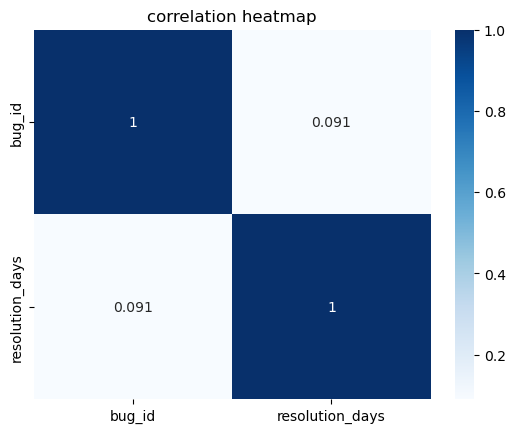

In [98]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap = "Blues")
plt.title("correlation heatmap")
plt.show()